In [187]:
swin_df = pd.read_csv('./jh_2_val_submission.csv')
swin_df.head()

,PredictionString,image_id
0,1 0.7148748 412.82513 196.61974 484.77332 248....,batch_01_vt/0003.jpg
1,2 0.99926215 83.28476 3.184639 384.2057 252.24...,batch_01_vt/0005.jpg
2,1 0.08670969 99.16899 210.68797 272.25055 336....,batch_01_vt/0006.jpg
3,1 0.09894883 253.08243 214.32303 286.05533 242...,batch_01_vt/0007.jpg
4,1 0.9966557 351.08615 332.18573 511.1512 411.4...,batch_01_vt/0010.jpg


In [188]:
def split_string(swin_df):
    cls_list = []
    str_list = list(str(swin_df['PredictionString']).split(' '))
    a = len(str_list)//6
    for i in range(a):
        cls_list.append(str_list[i*6])
        
    return cls_list

In [189]:
swin_df['class'] = swin_df.apply(split_string, axis=1)

In [190]:
swin_df['test_class'] = swin_df['class']

In [191]:
swin_df = swin_df.drop(['class'],axis=1)

In [192]:
swin_df = (swin_df.reset_index().rename(columns= {'index':'id'}))

In [199]:
swin_df

,id,PredictionString,image_id,test_class,test_count,1
0,0,1 0.7148748 412.82513 196.61974 484.77332 248....,batch_01_vt/0003.jpg,"[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 4, 4, 4, 4, ...",61,7
1,1,2 0.99926215 83.28476 3.184639 384.2057 252.24...,batch_01_vt/0005.jpg,"[2, 2]",2,0
2,2,1 0.08670969 99.16899 210.68797 272.25055 336....,batch_01_vt/0006.jpg,"[1, 1, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]",14,2
3,3,1 0.09894883 253.08243 214.32303 286.05533 242...,batch_01_vt/0007.jpg,"[1, 1, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, ...",36,2
4,4,1 0.9966557 351.08615 332.18573 511.1512 411.4...,batch_01_vt/0010.jpg,"[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 6, 6, ...",35,7
...,...,...,...,...,...,...
650,650,1 0.9979918 180.22394 177.7711 348.71838 367.5...,batch_01_vt/1069.jpg,"[1, 1, 1, 6, 6, 8, 8, 8, 8, 8, 8, 8]",12,3
651,651,1 0.89112 143.35696 181.18713 356.70218 354.92...,batch_01_vt/1070.jpg,"[1, 1, 2, 2]",4,2
652,652,0 0.051176194 309.9703 339.2909 374.887 368.35...,batch_01_vt/1071.jpg,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, ...",53,9
653,653,1 0.9773259 261.72247 397.0021 295.7976 442.79...,batch_01_vt/1072.jpg,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ...",38,10


In [194]:
def count_cls(swin_df):
    a = len(swin_df['test_class'])
    return a 

In [195]:
swin_df['test_count'] = swin_df.apply(count_cls, axis=1)
swin_df

,id,PredictionString,image_id,test_class,test_count
0,0,1 0.7148748 412.82513 196.61974 484.77332 248....,batch_01_vt/0003.jpg,"[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 4, 4, 4, 4, ...",61
1,1,2 0.99926215 83.28476 3.184639 384.2057 252.24...,batch_01_vt/0005.jpg,"[2, 2]",2
2,2,1 0.08670969 99.16899 210.68797 272.25055 336....,batch_01_vt/0006.jpg,"[1, 1, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]",14
3,3,1 0.09894883 253.08243 214.32303 286.05533 242...,batch_01_vt/0007.jpg,"[1, 1, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, ...",36
4,4,1 0.9966557 351.08615 332.18573 511.1512 411.4...,batch_01_vt/0010.jpg,"[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 6, 6, ...",35
...,...,...,...,...,...
650,650,1 0.9979918 180.22394 177.7711 348.71838 367.5...,batch_01_vt/1069.jpg,"[1, 1, 1, 6, 6, 8, 8, 8, 8, 8, 8, 8]",12
651,651,1 0.89112 143.35696 181.18713 356.70218 354.92...,batch_01_vt/1070.jpg,"[1, 1, 2, 2]",4
652,652,0 0.051176194 309.9703 339.2909 374.887 368.35...,batch_01_vt/1071.jpg,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, ...",53
653,653,1 0.9773259 261.72247 397.0021 295.7976 442.79...,batch_01_vt/1072.jpg,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ...",38


숫자를 변경해가면서 각 label개수를 추출했습니다.(더 편하게 수정하셔서 사용해보세요ㅠ)

In [225]:
def cls_cnt(swin_df):
    cls_l = swin_df['test_class'].count('11')
    return cls_l

In [226]:
# for i in range(1,12,1):
swin_df['11'] = swin_df.apply(cls_cnt, axis=1)

In [227]:
swin_df.head()

,id,PredictionString,image_id,test_class,test_count,1,2,3,4,5,6,7,8,9,10,11
0,0,1 0.7148748 412.82513 196.61974 484.77332 248....,batch_01_vt/0003.jpg,"[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 4, 4, 4, 4, ...",61,7,4,0,4,11,35,0,0,0,0,0
1,1,2 0.99926215 83.28476 3.184639 384.2057 252.24...,batch_01_vt/0005.jpg,"[2, 2]",2,0,2,0,0,0,0,0,0,0,0,0
2,2,1 0.08670969 99.16899 210.68797 272.25055 336....,batch_01_vt/0006.jpg,"[1, 1, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]",14,2,2,0,0,0,0,0,10,0,0,0
3,3,1 0.09894883 253.08243 214.32303 286.05533 242...,batch_01_vt/0007.jpg,"[1, 1, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, ...",36,2,5,0,0,0,0,0,29,0,0,0
4,4,1 0.9966557 351.08615 332.18573 511.1512 411.4...,batch_01_vt/0010.jpg,"[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 6, 6, ...",35,7,4,2,0,0,3,0,19,0,0,0


In [202]:
swin_df.describe()

,id,test_count,1
count,655.000000,655.000000,655.000000
mean,327.000000,38.818321,5.274809
std,189.226496,36.864521,6.772238
min,0.000000,2.000000,0.000000
25%,163.500000,6.000000,0.000000
50%,327.000000,23.000000,3.000000
75%,490.500000,73.000000,8.000000
max,654.000000,100.000000,62.000000


In [166]:
swin_df

,id,PredictionString,image_id,test_class,test_count,1,2,3,4,5,6,7,8,9,10,11
0,0,NaN,batch_01_vt/0003.jpg,[],0,0,0,0,0,0,0,0,0,0,0,0
1,1,1 0.06880857 446.9074 262.2232 476.03955 291.1...,batch_01_vt/0005.jpg,"[1, 1, 1, 1, 1, 1, 1]",7,7,0,0,0,0,0,0,0,0,0,0
2,2,2 0.061201807 486.5927 4.6963196 511.83972 25....,batch_01_vt/0006.jpg,[2],1,0,1,0,0,0,0,0,0,0,0,0
3,3,NaN,batch_01_vt/0007.jpg,[],0,0,0,0,0,0,0,0,0,0,0,0
4,4,1 0.1985582 445.20023 255.0738 469.90292 286.6...,batch_01_vt/0010.jpg,"[1, 1, 1, 1, 1, 1, 1, 1]",8,8,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,650,NaN,batch_01_vt/1069.jpg,[],0,0,0,0,0,0,0,0,0,0,0,0
651,651,NaN,batch_01_vt/1070.jpg,[],0,0,0,0,0,0,0,0,0,0,0,0
652,652,NaN,batch_01_vt/1071.jpg,[],0,0,0,0,0,0,0,0,0,0,0,0
653,653,1 0.124564365 306.11267 471.4422 343.83258 512...,batch_01_vt/1072.jpg,"[1, 1, 1, 1, 1, 1, 1]",7,7,0,0,0,0,0,0,0,0,0,0


In [108]:
val_df = pd.read_csv('../val_info2.csv')
val_df.head()

,id,class,count,1,2,3,4,5,6,7,8,9,10,11
0,0,"[8, 8, 6, 5, 5, 6, 5, 6, 6, 8, 8, 8, 8, 8, 8, ...",17,0,0,0,0,0,4,4,0,9,0,0
1,1,"[2, 6]",2,0,0,1,0,0,0,1,0,0,0,0
2,2,"[0, 1, 8, 8, 1, 8, 8]",7,1,2,0,0,0,0,0,0,4,0,0
3,3,"[2, 8, 8, 8, 8, 8, 8, 8, 8, 8]",10,0,0,1,0,0,0,0,0,9,0,0
4,4,"[8, 8, 8, 8, 3, 8]",6,0,0,0,1,0,0,0,0,5,0,0


In [ ]:
val_df

In [109]:
result_df = swin_df.merge(val_df, on='id',how='left')
result_df.head()

,id,PredictionString,image_id,test_class,test_count,class,count,1,2,3,4,5,6,7,8,9,10,11
0,0,NaN,batch_01_vt/0003.jpg,[],0,"[8, 8, 6, 5, 5, 6, 5, 6, 6, 8, 8, 8, 8, 8, 8, ...",17,0,0,0,0,0,4,4,0,9,0,0
1,1,1 0.06880857 446.9074 262.2232 476.03955 291.1...,batch_01_vt/0005.jpg,"[1, 1, 1, 1, 1, 1, 1]",7,"[2, 6]",2,0,0,1,0,0,0,1,0,0,0,0
2,2,2 0.061201807 486.5927 4.6963196 511.83972 25....,batch_01_vt/0006.jpg,[2],1,"[0, 1, 8, 8, 1, 8, 8]",7,1,2,0,0,0,0,0,0,4,0,0
3,3,NaN,batch_01_vt/0007.jpg,[],0,"[2, 8, 8, 8, 8, 8, 8, 8, 8, 8]",10,0,0,1,0,0,0,0,0,9,0,0
4,4,1 0.1985582 445.20023 255.0738 469.90292 286.6...,batch_01_vt/0010.jpg,"[1, 1, 1, 1, 1, 1, 1, 1]",8,"[8, 8, 8, 8, 3, 8]",6,0,0,0,1,0,0,0,0,5,0,0


In [86]:
# result_df = result_df.groupby('id')['test_class'].count().reset_index(name='test_count')

In [110]:
def count_diff(result_df):
    cnt = result_df['test_count'] - result_df['count']
    return cnt

In [111]:
result_df['cnt_dif'] = result_df.apply(count_diff,axis=1)
result_df

,id,PredictionString,image_id,test_class,test_count,class,count,1,2,3,4,5,6,7,8,9,10,11,cnt_dif
0,0,NaN,batch_01_vt/0003.jpg,[],0,"[8, 8, 6, 5, 5, 6, 5, 6, 6, 8, 8, 8, 8, 8, 8, ...",17,0,0,0,0,0,4,4,0,9,0,0,-17
1,1,1 0.06880857 446.9074 262.2232 476.03955 291.1...,batch_01_vt/0005.jpg,"[1, 1, 1, 1, 1, 1, 1]",7,"[2, 6]",2,0,0,1,0,0,0,1,0,0,0,0,5
2,2,2 0.061201807 486.5927 4.6963196 511.83972 25....,batch_01_vt/0006.jpg,[2],1,"[0, 1, 8, 8, 1, 8, 8]",7,1,2,0,0,0,0,0,0,4,0,0,-6
3,3,NaN,batch_01_vt/0007.jpg,[],0,"[2, 8, 8, 8, 8, 8, 8, 8, 8, 8]",10,0,0,1,0,0,0,0,0,9,0,0,-10
4,4,1 0.1985582 445.20023 255.0738 469.90292 286.6...,batch_01_vt/0010.jpg,"[1, 1, 1, 1, 1, 1, 1, 1]",8,"[8, 8, 8, 8, 3, 8]",6,0,0,0,1,0,0,0,0,5,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,650,NaN,batch_01_vt/1069.jpg,[],0,"[1, 8]",2,0,1,0,0,0,0,0,0,1,0,0,-2
651,651,NaN,batch_01_vt/1070.jpg,[],0,[2],1,0,0,1,0,0,0,0,0,0,0,0,-1
652,652,NaN,batch_01_vt/1071.jpg,[],0,"[6, 3, 1, 6, 1, 4, 4, 1, 4, 4, 3, 6, 4]",13,0,3,0,2,5,0,3,0,0,0,0,-13
653,653,1 0.124564365 306.11267 471.4422 343.83258 512...,batch_01_vt/1072.jpg,"[1, 1, 1, 1, 1, 1, 1]",7,"[2, 1, 1, 2, 2, 2, 2, 2, 2]",9,0,2,7,0,0,0,0,0,0,0,0,-2


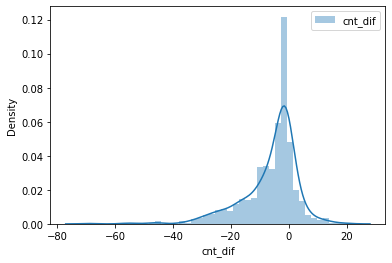

In [112]:
sns.distplot(result_df['cnt_dif'], label='cnt_dif')

plt.legend()
plt.show()

In [228]:
val_cnt_df = val_df.loc[:,['id','1','2','3','4','5','6','7','8','9','10','11']]

In [229]:
val_cnt_df.head()

,id,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,0,0,4,4,0,9,0,0
1,1,0,0,1,0,0,0,1,0,0,0,0
2,2,1,2,0,0,0,0,0,0,4,0,0
3,3,0,0,1,0,0,0,0,0,9,0,0
4,4,0,0,0,1,0,0,0,0,5,0,0


In [230]:
swin_cnt_df = swin_df.loc[:,['id','1','2','3','4','5','6','7','8','9','10','11']]
swin_cnt_df.head()

,id,1,2,3,4,5,6,7,8,9,10,11
0,0,7,4,0,4,11,35,0,0,0,0,0
1,1,0,2,0,0,0,0,0,0,0,0,0
2,2,2,2,0,0,0,0,0,10,0,0,0
3,3,2,5,0,0,0,0,0,29,0,0,0
4,4,7,4,2,0,0,3,0,19,0,0,0


In [170]:
display(val_cnt_df,swin_cnt_df)

,id,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,0,0,4,4,0,9,0,0
1,1,0,0,1,0,0,0,1,0,0,0,0
2,2,1,2,0,0,0,0,0,0,4,0,0
3,3,0,0,1,0,0,0,0,0,9,0,0
4,4,0,0,0,1,0,0,0,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
650,650,0,1,0,0,0,0,0,0,1,0,0
651,651,0,0,1,0,0,0,0,0,0,0,0
652,652,0,3,0,2,5,0,3,0,0,0,0
653,653,0,2,7,0,0,0,0,0,0,0,0


,id,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,7,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0
4,4,8,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
650,650,0,0,0,0,0,0,0,0,0,0,0
651,651,0,0,0,0,0,0,0,0,0,0,0
652,652,0,0,0,0,0,0,0,0,0,0,0
653,653,7,0,0,0,0,0,0,0,0,0,0


In [ ]:
def class_cnt_diff():
    

In [173]:
ddd = convert(Array, swin_cnt_df)
ddd

NameError: name 'convert' is not defined

In [231]:
# val_cnt_df.to_csv('../val_count.csv', index=None)
swin_cnt_df.to_csv('../swin_count.csv', index=None)

In [233]:
ground_swin = pd.read_csv('../ground_swin_diff.csv')
ground_swin

,id,1,2,3,4,5,6,7,8,9,10,11
0,0,-7,-4,0,-4,-11,-31,4,0,9,0,0
1,1,0,-2,1,0,0,0,1,0,0,0,0
2,2,-1,0,0,0,0,0,0,-10,4,0,0
3,3,-2,-5,1,0,0,0,0,-29,9,0,0
4,4,-7,-4,-2,1,0,-3,0,-19,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
650,650,-3,1,0,0,0,-2,0,-7,1,0,0
651,651,-2,-2,1,0,0,0,0,0,0,0,0
652,652,-9,3,0,-26,-1,-7,3,-2,0,0,0
653,653,-10,-20,5,0,0,-2,-2,0,0,0,0


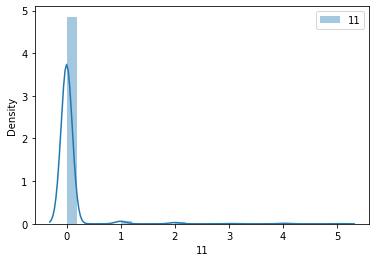

In [244]:
sns.distplot(ground_swin['11'], label='11')

plt.legend()
plt.show()